# Predictive Analysis of SNL_RWA_TO_ASSETS Using Macroeconomic Indicators
This notebook explores the relationship between various macroeconomic indicators and the `SNL_RWA_TO_ASSETS` ratio using a dataset of global banking institutions. We will perform a correlation analysis to determine the influence of these indicators and subsequently develop a predictive model using Linear Regression.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading and Initial Analysis

In [ ]:
file_path = '/content/drive/MyDrive/colab_data/GSIB_data/Final_data_without_formula.xlsx'
data = pd.read_excel(file_path)
data.head()

,Bank Name,DSIB or GSIB or Both,Country,SP_Entity_Id,Country_id,Year_Id,Trade Balance ($B),Goods Exports ($B),Goods Imported ($B),Nominal GDP ($B),...,SNL_WHOLESALE_FUNDING,SNL_RWA_TO_ASSETS,SNL_PROBLEM_LOANS,SNL_PROBLEM_LOAN_TYPE,SNL_PROBLEM_LOANS_TO_CUSTOMER_LOANS,SNL_PROBLEM_LOANS_TO_TANG_EQUITY_RESERVES,SNL_LLP_TO_AVG_GROSS_CUSTOMER_LOAN,SNL_CREDIT_COSTS_TO_PRE_IMPAIR_OPER_PROFIT,SNL_LLR_TO_GROSS_CUSTOMER_LOANS,SNL_PROBLEM_LOANS_TO_RWA
0,Agricultural Bank of China,GSIB,China,4149089,CHN,1990Y,6.96,41.07,34.11,396.31,...,0.0,0.0,0.0,Nonperforming Loans,0.0,0,0.0,0,0.0,0.0
1,Agricultural Bank of China,GSIB,China,4149089,CHN,1991Y,6.17,45.99,39.82,409.51,...,0.0,0.0,0.0,Nonperforming Loans,0.0,0,0.0,0,0.0,0.0
2,Agricultural Bank of China,GSIB,China,4149089,CHN,1992Y,1.85,54.27,52.42,493.51,...,0.0,0.0,0.0,Nonperforming Loans,0.0,0,0.0,0,0.0,0.0
3,Agricultural Bank of China,GSIB,China,4149089,CHN,1993Y,-14.34,59.70,74.04,618.79,...,0.0,0.0,0.0,Nonperforming Loans,0.0,0,0.0,0,0.0,0.0
4,Agricultural Bank of China,GSIB,China,4149089,CHN,1994Y,3.46,84.41,80.95,564.34,...,0.0,0.0,0.0,Nonperforming Loans,0.0,0,0.0,0,0.0,0.0


## Data Cleaning
Remove rows where any relevant macroeconomic attribute or the target variable (`SNL_RWA_TO_ASSETS`) is zero as these may not represent meaningful data.

In [ ]:
relevant_columns = ['Trade Balance ($B)', 'Goods Exports ($B)', 'Goods Imported ($B)', 'Nominal GDP ($B)',
                    'GDP Per Capita ($)', 'Real GDP Growth (%)', 'Real GDP, Local Currency ($B)', 'Population (M)',
                    'Consumer Price Inflation (%)', 'Producer Price Inflation (%)', 'Exchange Rate, average ', 'Exchange Rate, end ', 'SNL_RWA_TO_ASSETS']
cleaned_data = data[relevant_columns][(data[relevant_columns] != 0).all(axis=1)]

In [ ]:
# prompt: I want to check he description like number of null value, column type etc in clean_data

cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 18 to 917
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Trade Balance ($B)             395 non-null    float64
 1   Goods Exports ($B)             395 non-null    float64
 2   Goods Imported ($B)            395 non-null    float64
 3   Nominal GDP ($B)               395 non-null    float64
 4   GDP Per Capita ($)             395 non-null    float64
 5   Real GDP Growth (%)            395 non-null    float64
 6   Real GDP, Local Currency ($B)  395 non-null    float64
 7   Population (M)                 395 non-null    float64
 8   Consumer Price Inflation (%)   395 non-null    float64
 9   Producer Price Inflation (%)   395 non-null    float64
 10  Exchange Rate, average         395 non-null    float64
 11  Exchange Rate, end             395 non-null    float64
 12  SNL_RWA_TO_ASSETS              395 non-null    float64

## Correlation Analysis
Calculate and visualize the correlation between `SNL_RWA_TO_ASSETS` and macroeconomic indicators to understand their relationship.

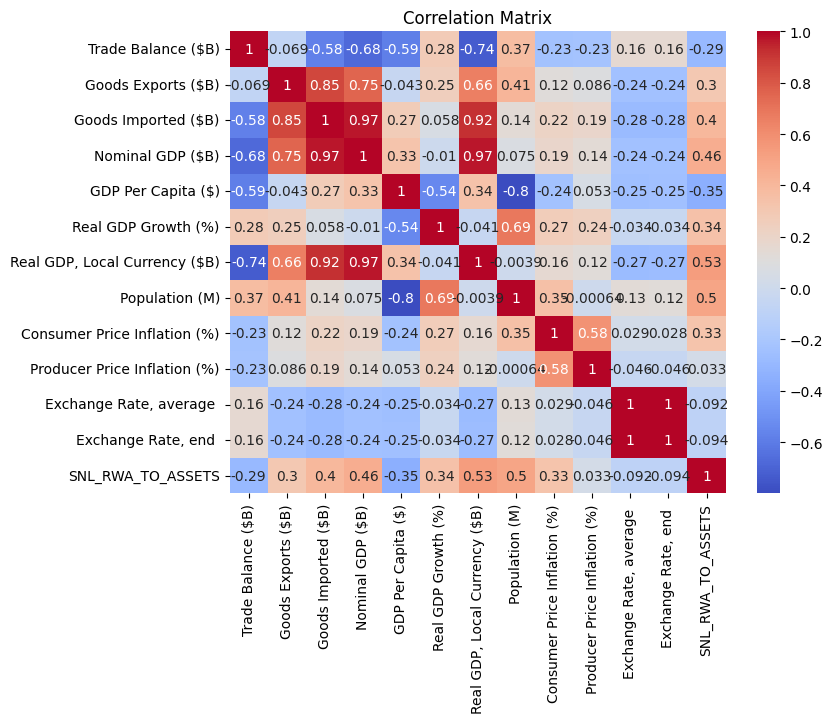

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the width and height as needed
correlation_results = cleaned_data.corr()['SNL_RWA_TO_ASSETS'].sort_values(key=abs, ascending=False).drop('SNL_RWA_TO_ASSETS')
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Correlation Matrix:**
- The heatmap visualizes the correlation between `SNL_RWA_TO_ASSETS` and other macroeconomic indicators.
- Positive correlations are indicated by warmer colors (red), while negative correlations are indicated by cooler colors (blue).
- The intensity of the color corresponds to the strength of the correlation.

## Model Development and Evaluation
Develop a Linear Regression model to predict `SNL_RWA_TO_ASSETS` and evaluate its performance.

In [ ]:
X = cleaned_data.drop('SNL_RWA_TO_ASSETS', axis=1)
y = cleaned_data['SNL_RWA_TO_ASSETS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')

R-squared: 0.7501432320193571
RMSE: 9.186865764822338


In [ ]:
# prompt: Can you please apply random forest model

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
random_forest_model = RandomForestRegressor()

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model performance
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f'Random Forest Model:')
print(f'R-squared: {r2_rf}')
print(f'RMSE: {rmse_rf}')


Random Forest Model:
R-squared: 0.7512779329059934
RMSE: 9.16598138562774


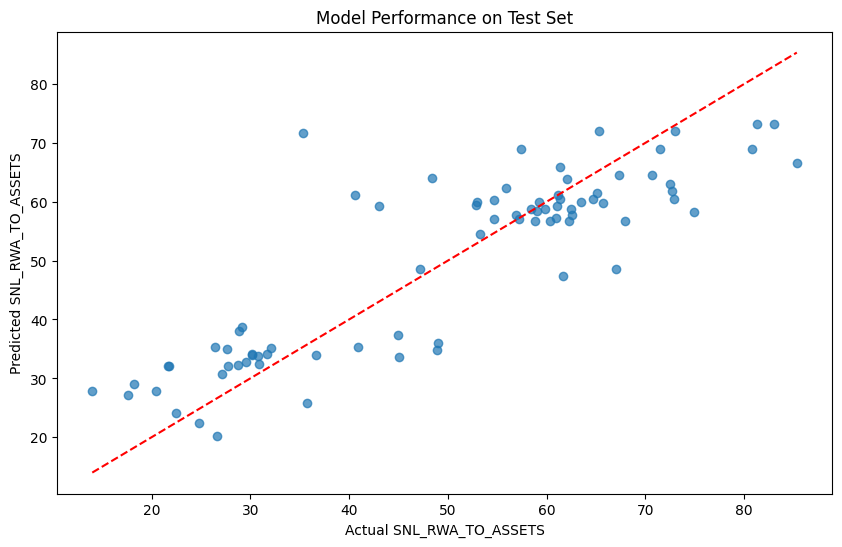

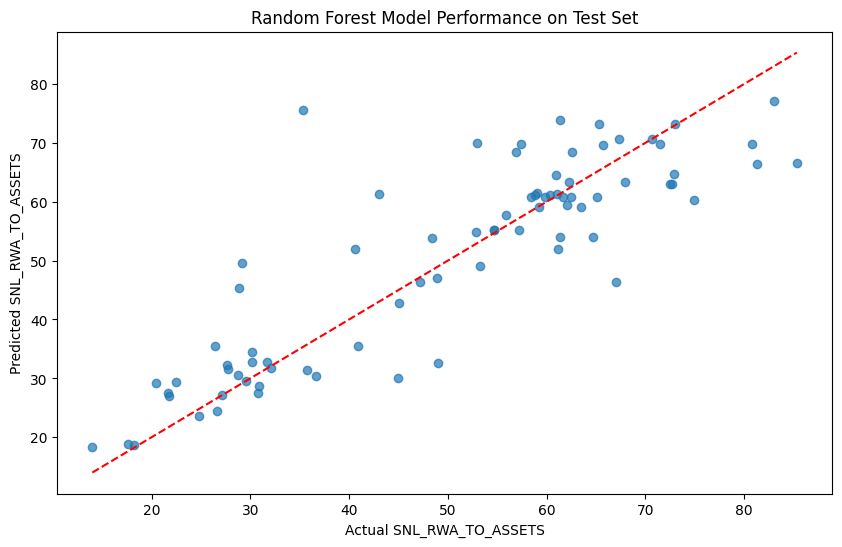

In [ ]:
# prompt: Can you please create a visual representation of how the model is able to predict the data i.e. it's performance

import matplotlib.pyplot as plt
# Plot the actual and predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual SNL_RWA_TO_ASSETS')
plt.ylabel('Predicted SNL_RWA_TO_ASSETS')
plt.title('Model Performance on Test Set')
plt.show()

# Plot the actual and predicted values for the test set for Random Forest Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual SNL_RWA_TO_ASSETS')
plt.ylabel('Predicted SNL_RWA_TO_ASSETS')
plt.title('Random Forest Model Performance on Test Set')
plt.show()


**Model Performance:**
- The scatter plot compares the actual and predicted values of `SNL_RWA_TO_ASSETS` for both the Linear Regression and Random Forest models.
- The red dashed line represents the ideal case where the predicted values perfectly match the actual values.
- The spread of the data points around the red line indicates the accuracy of the model.

**Summary:**
- The correlation analysis revealed that certain macroeconomic indicators like `Trade Balance`, `Nominal GDP`, and `Real GDP Growth` have a positive association with `SNL_RWA_TO_ASSETS`.
- The Linear Regression and Random Forest models showed moderate performance in predicting `SNL_RWA_TO_ASSETS`, with the Random Forest model having slightly better accuracy.
- Further analysis and model refinement may be needed to improve the predictive power.